In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("D:\\ML\\csv\\dc.csv")

In [5]:
df.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [7]:
df.shape

(1000, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   object 
 1   open_SAR    1000 non-null   float64
 2   open_USD    1000 non-null   float64
 3   high_SAR    1000 non-null   float64
 4   high_USD    1000 non-null   float64
 5   low_SAR     1000 non-null   float64
 6   low_USD     1000 non-null   float64
 7   close_SAR   1000 non-null   float64
 8   close_USD   1000 non-null   float64
 9   volume      1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [11]:
df.duplicated().sum()

0

In [13]:
df.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34825.322255,9285.762120,35789.618165,9542.880270,33796.329057,9011.393200,34917.483572,9310.335850,53100.498000
std,21728.028028,5793.522832,22785.946842,6075.604427,20565.410145,5483.524463,21928.280072,5846.917681,35329.832031
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24254.558752,6467.192500,24686.089152,6582.255000,23721.336256,6325.015000,24252.946080,6466.762500,30045.750000
50%,30714.632128,8189.695000,31321.953152,8351.630000,30010.869568,8002.045000,30713.263232,8189.330000,43795.500000
75%,38317.311744,10216.860000,39077.527200,10419.562500,37158.878816,9907.977500,38329.725568,10220.170000,64909.250000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


In [15]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 0    0
open_SAR      0
open_USD      0
high_SAR      0
high_USD      0
low_SAR       0
low_USD       0
close_SAR     0
close_USD     0
volume        0
dtype: int64

In [17]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])

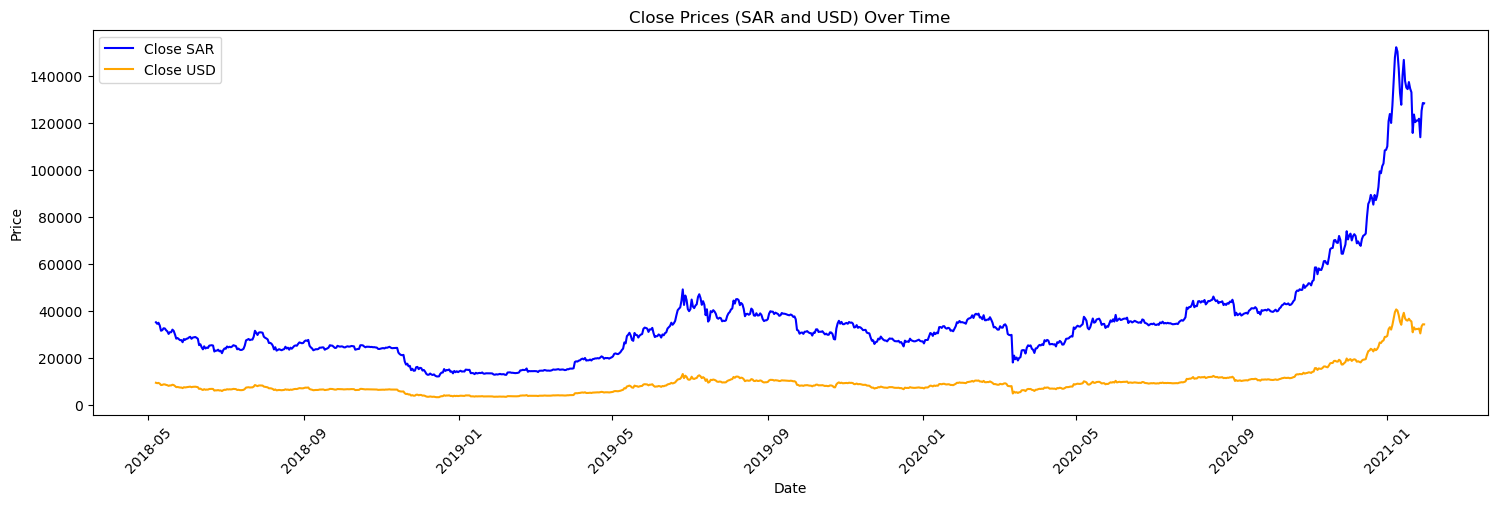

In [19]:
plt.figure(figsize=(18, 5))
plt.plot(df["Unnamed: 0"], df["close_SAR"], label="Close SAR", color='blue')
plt.plot(df["Unnamed: 0"], df["close_USD"], label="Close USD", color='orange')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Close Prices (SAR and USD) Over Time")
plt.legend()
plt.show()

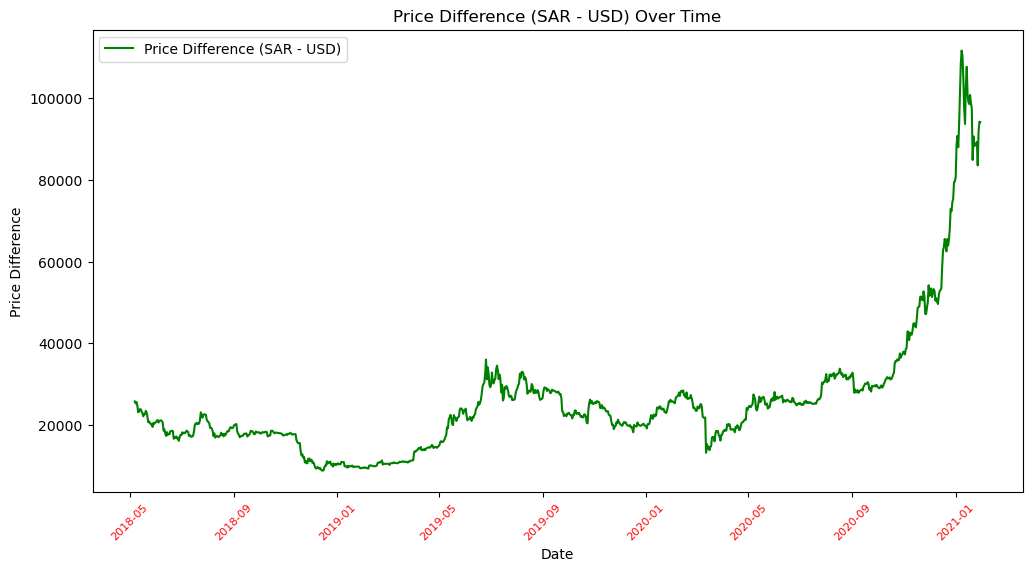

In [21]:
df['Price Difference'] = df['close_SAR'] - df['close_USD']
plt.figure(figsize=(12, 6))
plt.plot(df["Unnamed: 0"], df["Price Difference"], label="Price Difference (SAR - USD)", color='green')
plt.xticks(rotation=45, fontsize=8, color='red')
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.title("Price Difference (SAR - USD) Over Time")
plt.legend()
plt.show()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

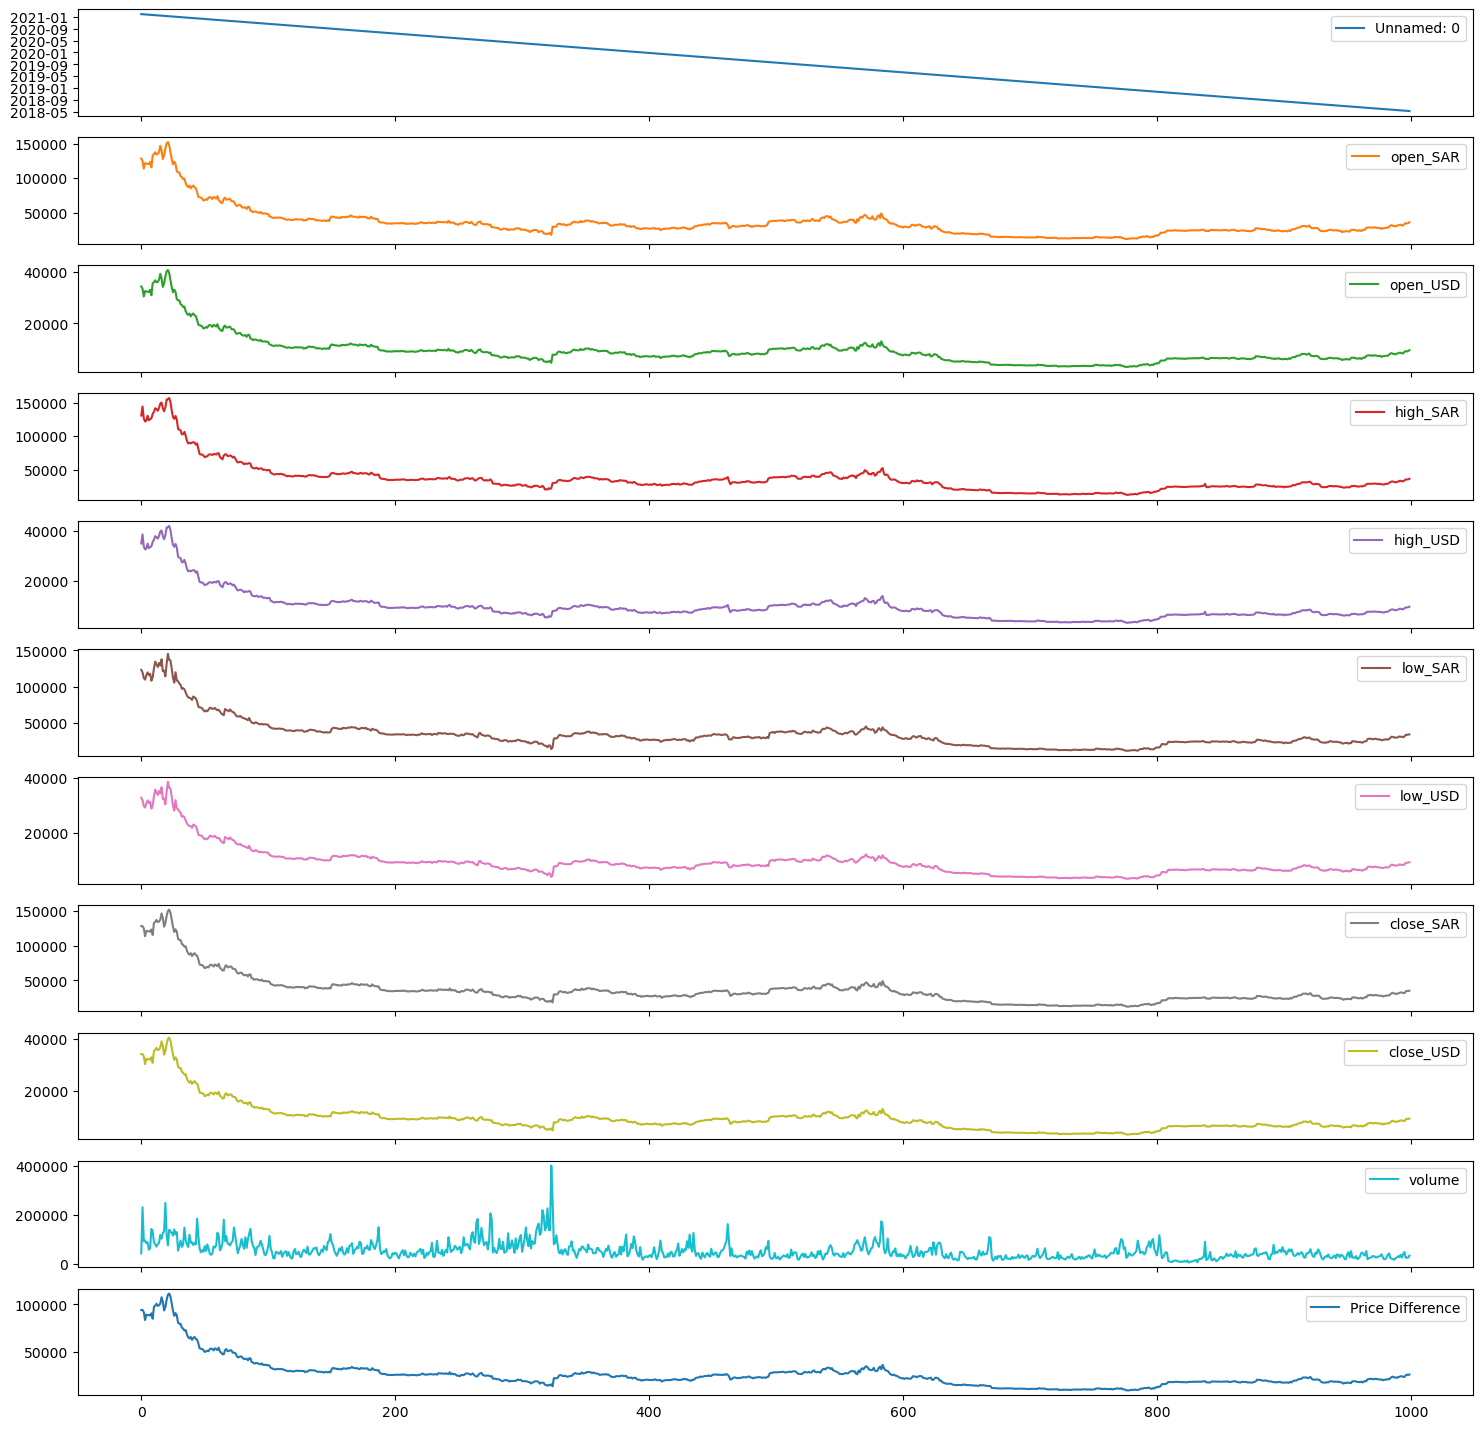

In [23]:
df.plot(figsize=(18,18),subplots=True)

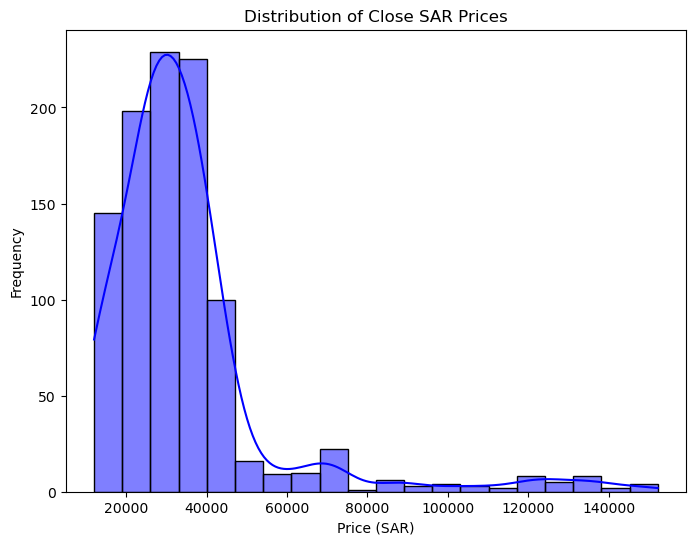

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df["close_SAR"], kde=True, color='blue', bins=20)
plt.title("Distribution of Close SAR Prices")
plt.xlabel("Price (SAR)")
plt.ylabel("Frequency")
plt.show()

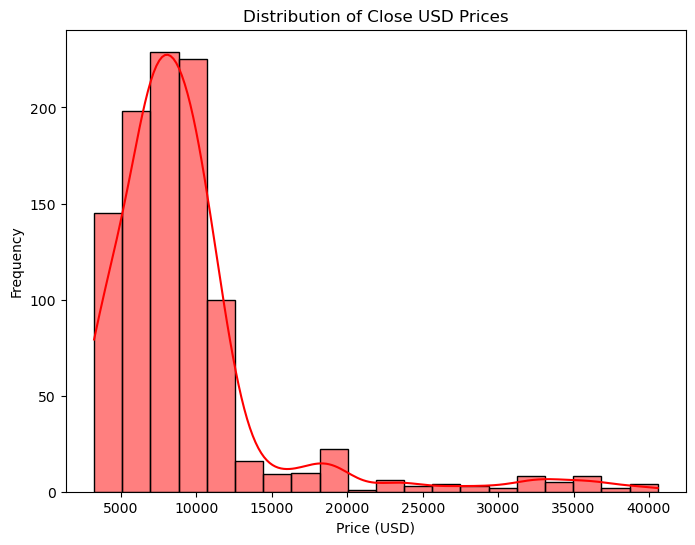

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df["close_USD"], kde=True, color='red', bins=20)
plt.title("Distribution of Close USD Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

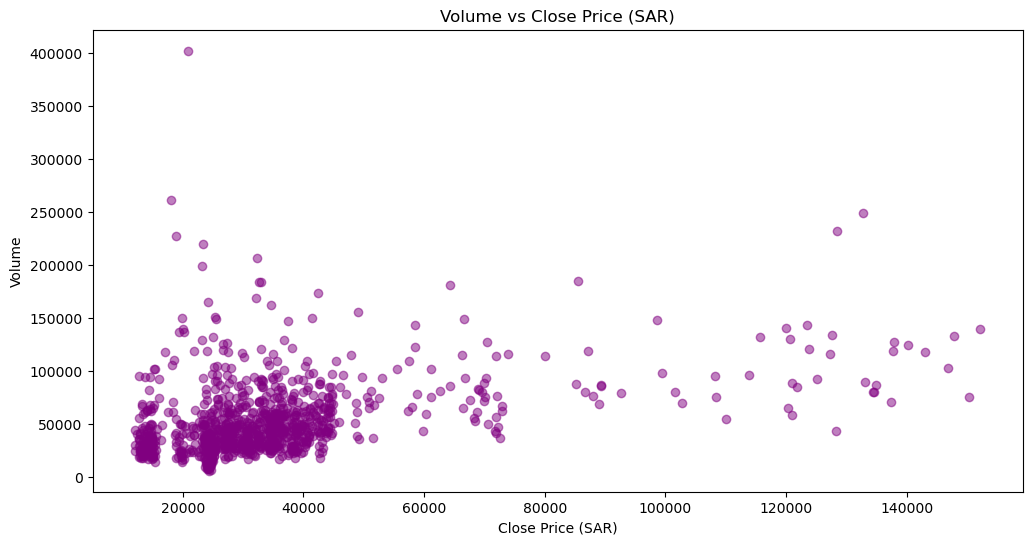

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(df["close_SAR"], df["volume"], color='purple', alpha=0.5)
plt.xlabel("Close Price (SAR)")
plt.ylabel("Volume")
plt.title("Volume vs Close Price (SAR)")
plt.show()

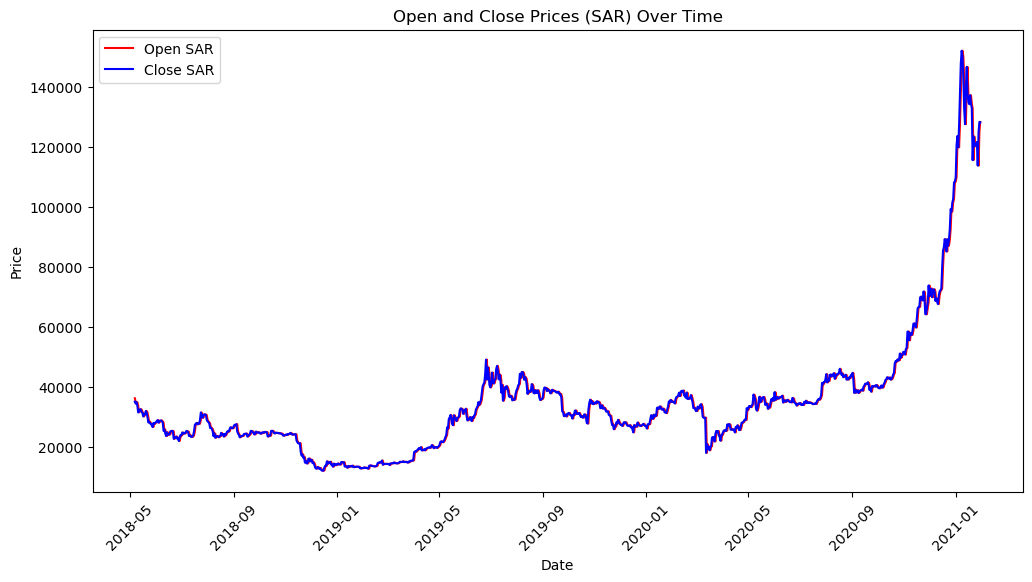

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df["Unnamed: 0"], df["open_SAR"], label="Open SAR", color='red')
plt.plot(df["Unnamed: 0"], df["close_SAR"], label="Close SAR", color='blue')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Open and Close Prices (SAR) Over Time")
plt.legend()
plt.show()

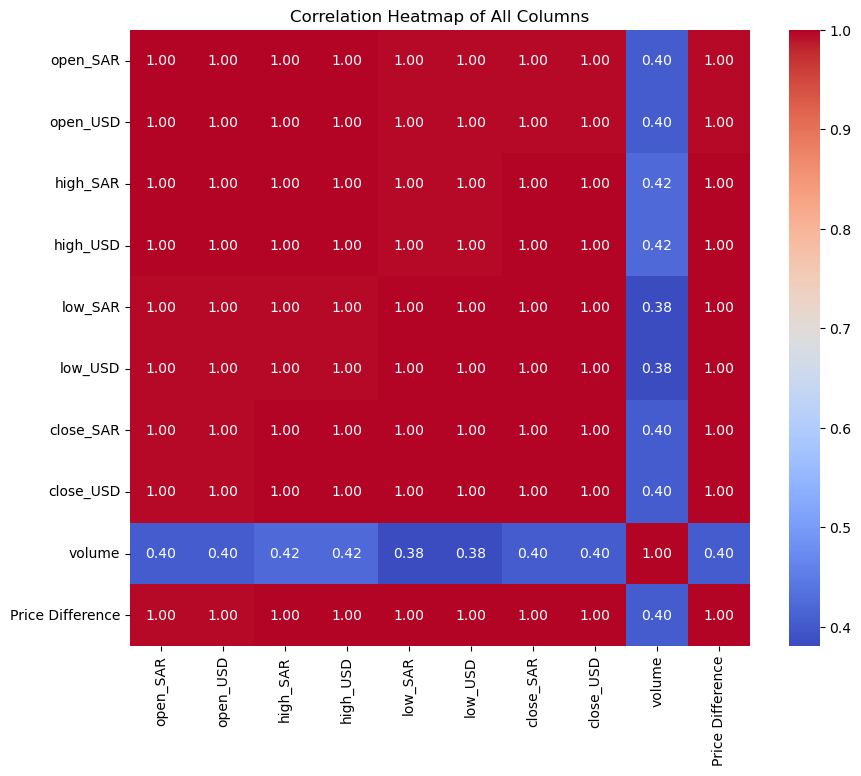

In [33]:
plt.figure(figsize=(10, 8)) 
numeric_df = df.select_dtypes(include=["number"]) 
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of All Columns")
plt.show()

In [35]:
df = df.sort_values('Unnamed: 0')
df.set_index('Unnamed: 0', inplace=True)

In [37]:
df['t-3'] = df['close_SAR'].shift(3)
df['t-2'] = df['close_SAR'].shift(2)
df['t-1'] = df['close_SAR'].shift(1)

In [39]:
df['target'] = df['close_SAR']

In [47]:
df = df.dropna()
print(df[['t-3', 't-2', 't-1', 'target']].head(10))

                     t-3           t-2           t-1        target
Unnamed: 0                                                        
2018-05-10  35122.496000  34457.025024  34916.224000  33761.850880
2018-05-11  34457.025024  34916.224000  33761.850880  31503.360000
2018-05-12  34916.224000  33761.850880  31503.360000  31750.661376
2018-05-13  33761.850880  31503.360000  31750.661376  32552.384384
2018-05-14  31503.360000  31750.661376  32552.384384  32490.990336
2018-05-15  31750.661376  32552.384384  32490.990336  31735.884800
2018-05-16  32552.384384  32490.990336  31735.884800  31240.832000
2018-05-17  32490.990336  31735.884800  31240.832000  30158.691584
2018-05-18  31735.884800  31240.832000  30158.691584  30902.583424
2018-05-19  31240.832000  30158.691584  30902.583424  30878.880896


In [49]:
X = df[['t-3', 't-2', 't-1']].values
y = df['target'].values

In [53]:
X.shape

(997, 3)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = model_lr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("score_train:", model_lr.score(X_train, y_train))

MSE: 3115958.731314926
R² Score: 0.9932702750422621
score_train: 0.9937306847772318


In [86]:
test_dates = df.index[-len(y_pred):]

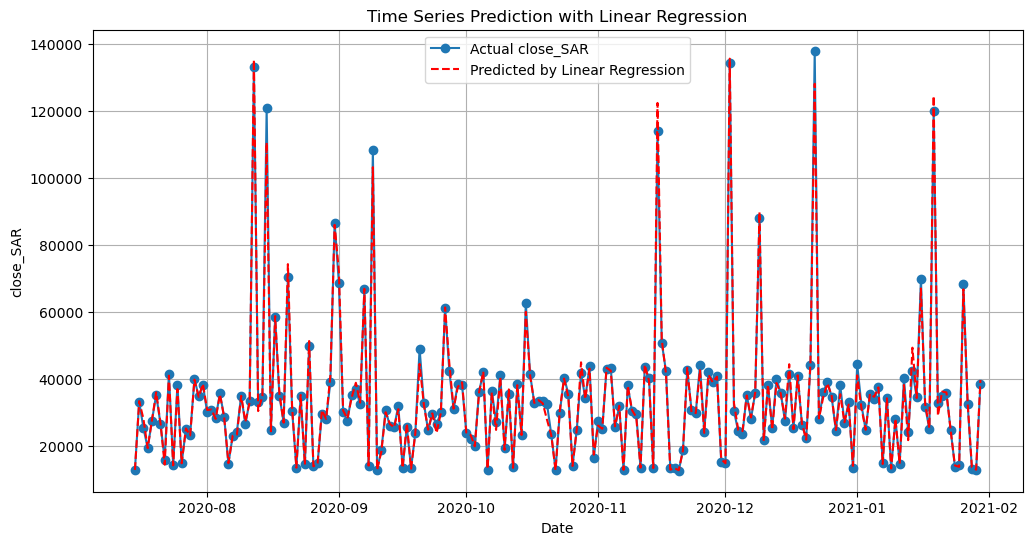

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual close_SAR', marker='o')
plt.plot(test_dates, y_pred, label='Predicted by Linear Regression', linestyle='--',color='red')
plt.xlabel('Date')
plt.ylabel('close_SAR')
plt.title('Time Series Prediction with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
w = df[['t-3', 't-2', 't-1']].values
z = df['target'].values

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [121]:
w_scaled = scaler.fit_transform(w)
z_scaled = scaler.fit_transform(z.reshape(-1, 1))

In [123]:
w_scaled

array([[ 2.26182970e-02, -1.26578920e-02,  4.23825402e-03],
       [-8.54371568e-03,  8.65415406e-03, -4.88369434e-02],
       [ 1.29591970e-02, -4.49218650e-02, -1.52676722e-01],
       ...,
       [ 4.04241959e+00,  4.03952201e+00,  3.63503526e+00],
       [ 4.07992675e+00,  3.67371164e+00,  4.15211494e+00],
       [ 3.71084025e+00,  4.19567052e+00,  4.30512256e+00]])

In [125]:
w_train, w_test, z_train, z_test = train_test_split(w_scaled,z_scaled, test_size=0.2, random_state=0)

In [127]:
model_lr = LinearRegression()
model_lr.fit(w_train, z_train)
z_pred = model_lr.predict(w_test)
print("MSE:", mean_squared_error(z_test, z_pred))
print("R² Score:", r2_score(z_test, z_pred))
print("score_train:", model_lr.score(w_train, z_train))


MSE: 0.006467142910145609
R² Score: 0.9932702750422621
score_train: 0.9937306847772318


In [129]:
test_dates = df.index[-len(z_pred):]

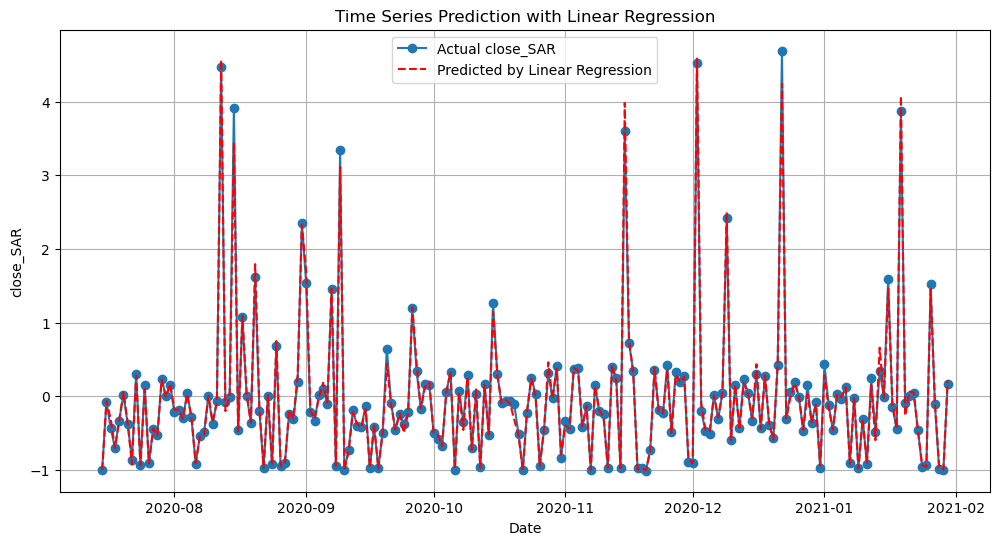

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(test_dates, z_test, label='Actual close_SAR', marker='o')
plt.plot(test_dates, z_pred, label='Predicted by Linear Regression', linestyle='--',color='red')
plt.xlabel('Date')
plt.ylabel('close_SAR')
plt.title('Time Series Prediction with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()